In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
import os
import django
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'rest.settings')
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()
from advertising.models import Advertising

ad_data = pd.DataFrame(list(Advertising.objects.all().values()))

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   id                        1000 non-null   int64              
 1   daily_time_spent_on_site  1000 non-null   float64            
 2   age                       1000 non-null   int64              
 3   area_income               1000 non-null   float64            
 4   daily_internet_usage      1000 non-null   float64            
 5   ad_topic_line             1000 non-null   object             
 6   city                      1000 non-null   object             
 7   male                      1000 non-null   bool               
 8   country                   1000 non-null   object             
 9   timestamp                 1000 non-null   datetime64[ns, UTC]
 10  clicked_on_ad             1000 non-null   bool               
dtypes: bool(2), dateti

In [5]:
ad_data.describe()

,id,daily_time_spent_on_site,age,area_income,daily_internet_usage
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,502.500000,65.000200,36.009000,55000.000080,180.000100
std,288.819436,15.853615,8.785562,13414.634022,43.902339
min,3.000000,32.600000,19.000000,13996.500000,104.780000
25%,252.750000,51.360000,29.000000,47031.802500,138.830000
50%,502.500000,68.215000,35.000000,57012.300000,183.130000
75%,752.250000,78.547500,42.000000,65470.635000,218.792500
max,1002.000000,91.430000,61.000000,79484.800000,269.960000


Text(0.5, 0, 'age')

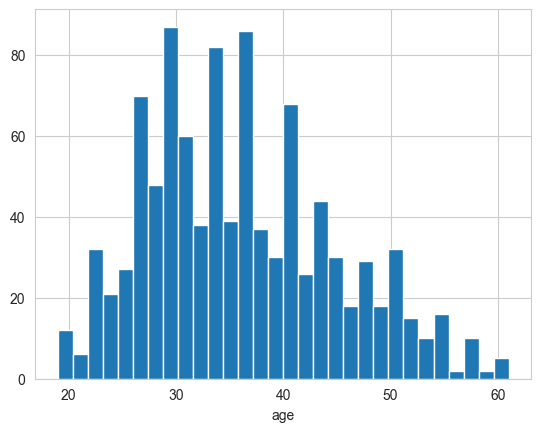

In [6]:
sns.set_style('whitegrid')
ad_data['age'].hist(bins=30)
plt.xlabel('age')

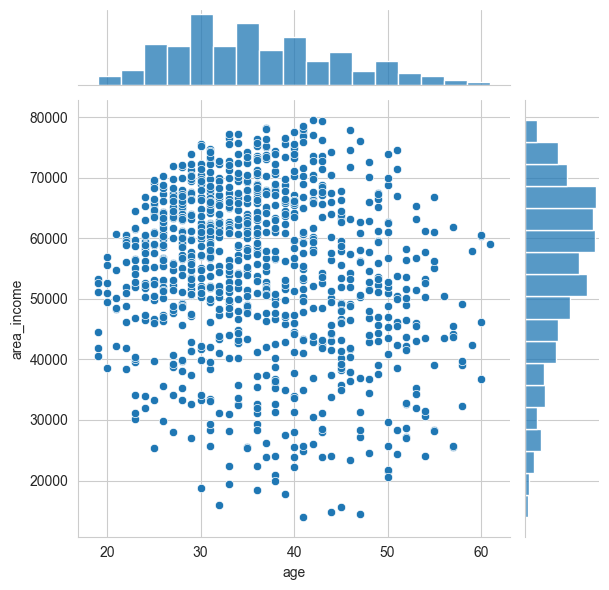

In [7]:
sns.jointplot(x='age',y='area_income',data=ad_data)


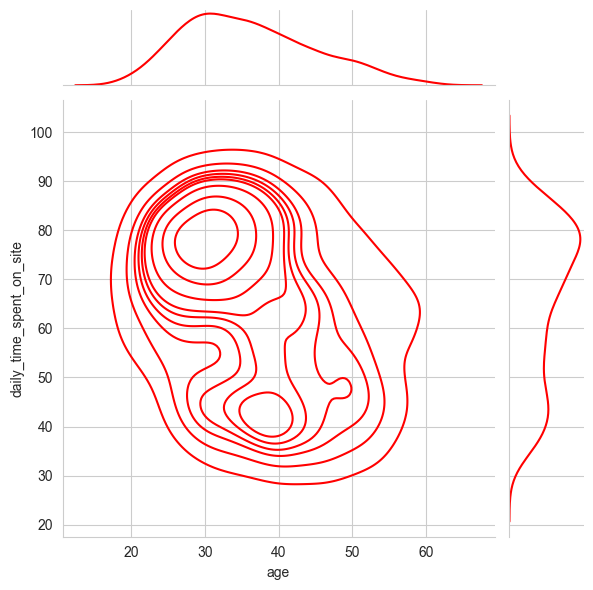

In [8]:
sns.jointplot(x='age',y='daily_time_spent_on_site',data=ad_data,color='red',kind='kde');


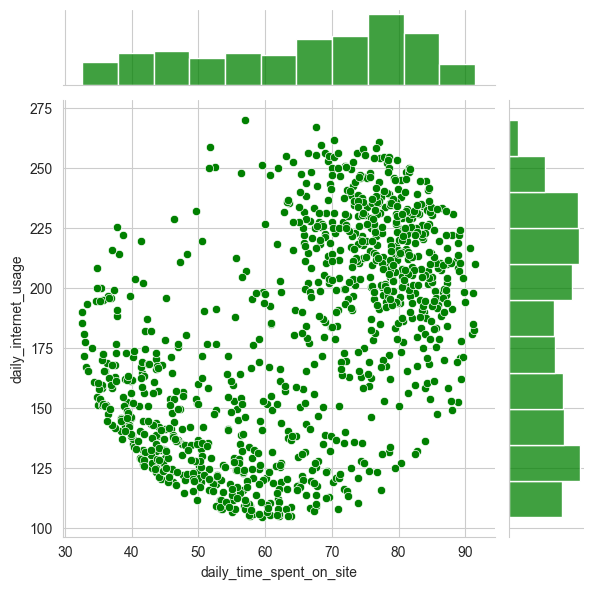

In [9]:
sns.jointplot(x='daily_time_spent_on_site',y='daily_internet_usage',data=ad_data,color='green')

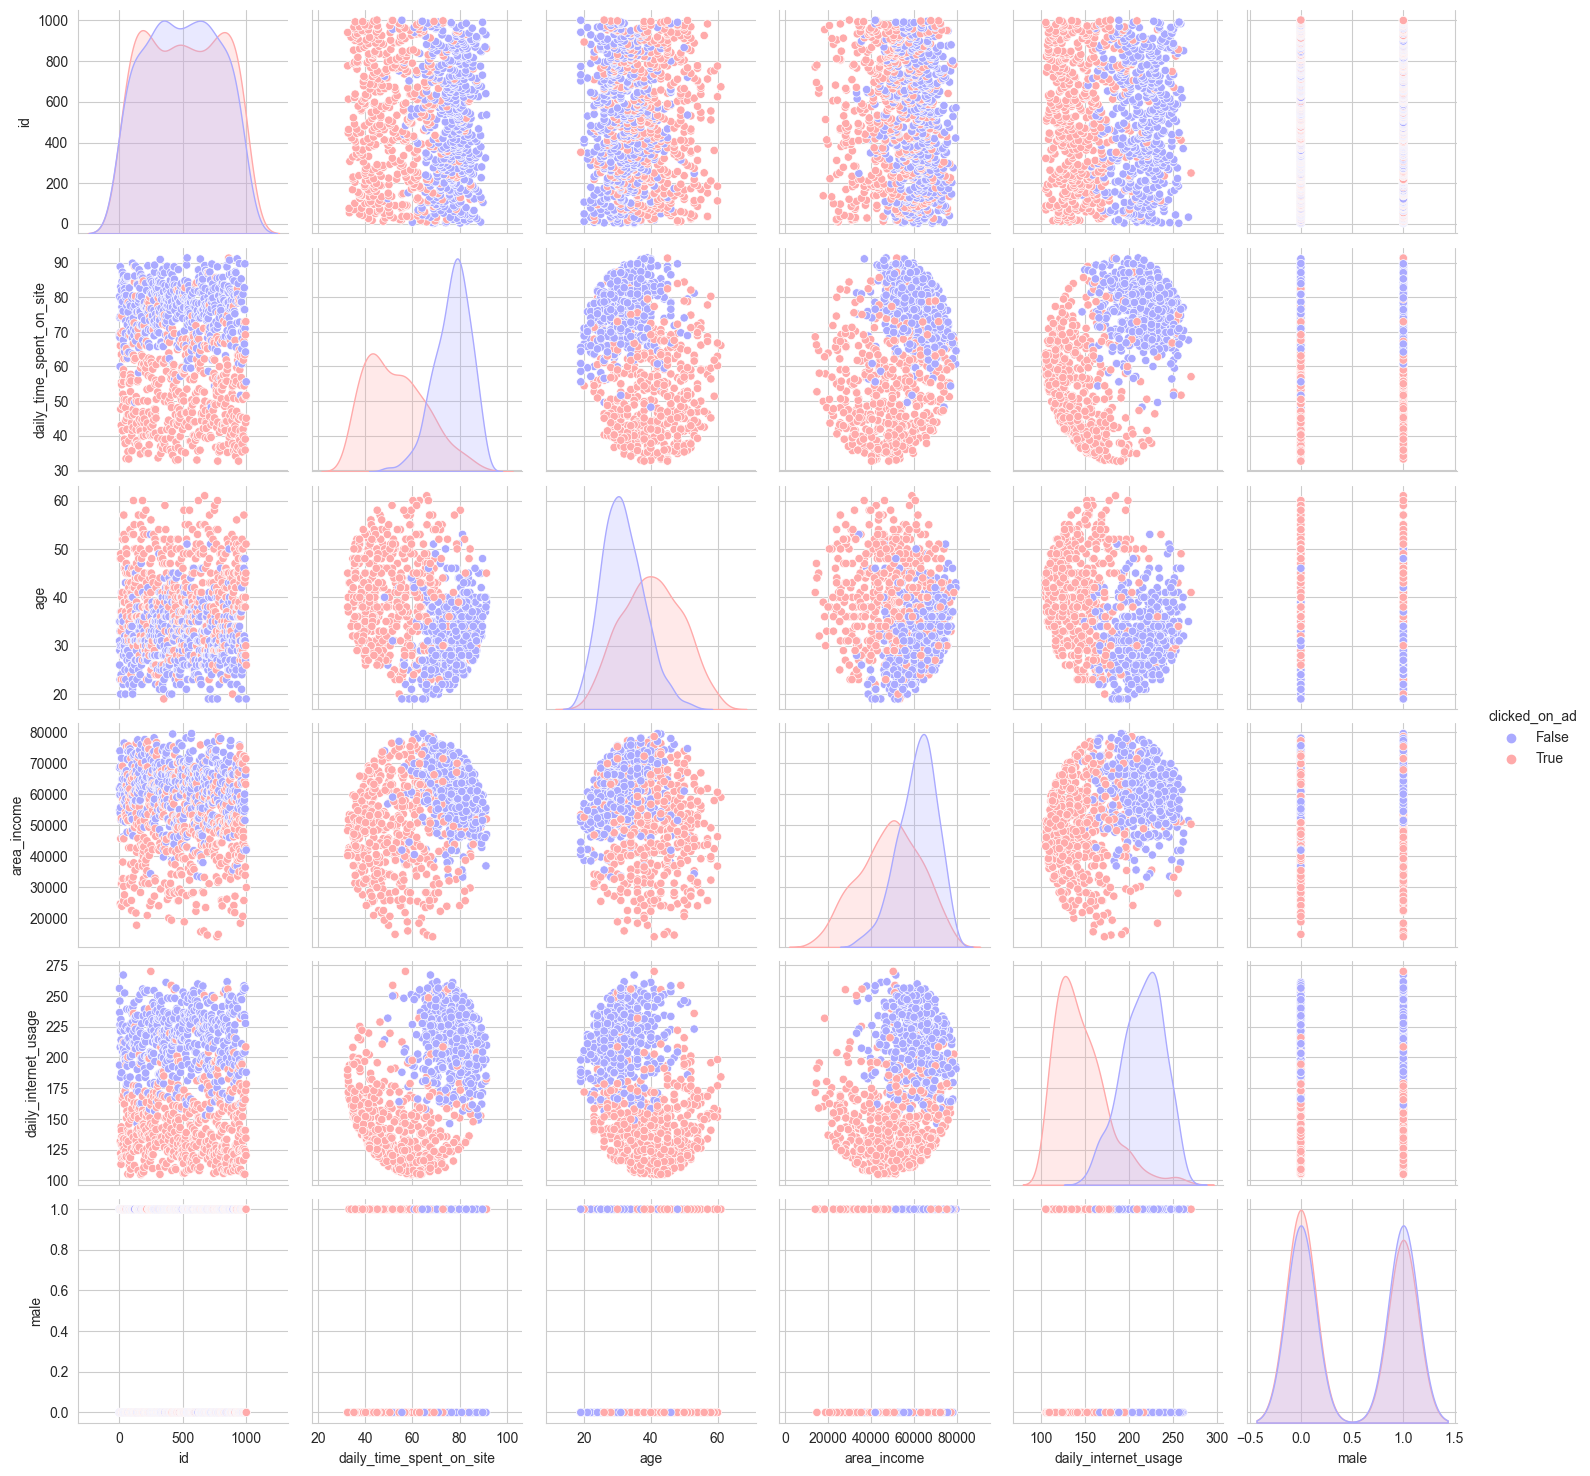

In [10]:
sns.pairplot(ad_data,hue='clicked_on_ad',palette='bwr')


In [11]:
X = ad_data[['daily_time_spent_on_site', 'age', 'area_income','daily_internet_usage', 'male']]
y = ad_data['clicked_on_ad']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [21]:
predictions = logmodel.predict(X_test)
# type(X_test.head())
X_test
# predictions

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male
521,63.26,29,54787.37,120.46,True
737,71.23,52,41521.28,122.59,False
740,43.63,38,61757.12,135.25,True
660,42.04,49,67323.00,182.11,False
411,78.68,29,66225.72,208.05,False
...,...,...,...,...,...
506,77.05,31,62161.26,236.64,False
342,88.12,38,46653.75,230.91,False
485,66.88,35,62790.96,119.47,True
711,69.96,31,73413.87,214.06,True


In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.86      0.96      0.91       162
        True       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [16]:
import pickle
pickle.dump(logmodel, open('ad_model.sav', 'wb'))